In [399]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [400]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [401]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [402]:
df.shape

(1338, 7)

In [403]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The Dataset is complete and there is no null values

In [405]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [406]:
df.duplicated().sum()

np.int64(1)

In [407]:
df=df.drop_duplicates()

One duplicated row was found and removed from the dataset.

In [408]:
df.duplicated().sum()

np.int64(0)

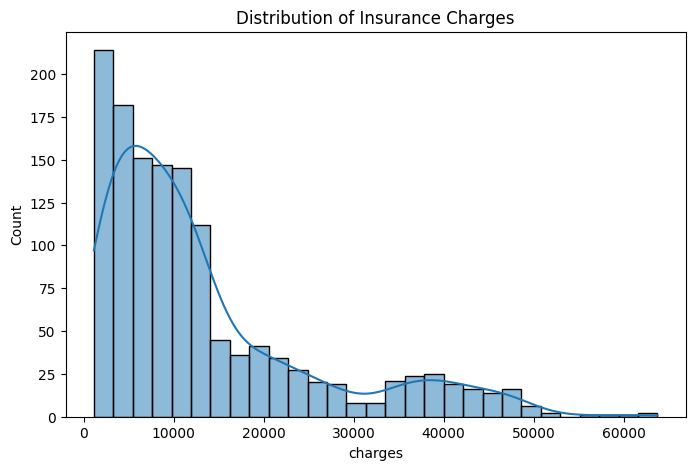

In [409]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'] , kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()

The target variable is right-skewed, indicating the presence of high-cost outliers

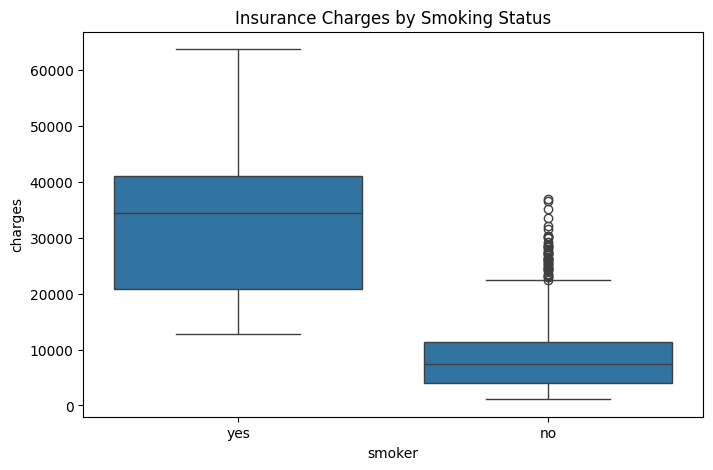

In [410]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker' ,y='charges' , data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()

The boxplot reveals a substantial difference in insurance charges between smokers and non-smokers. Smokers have a much higher median charge and a wider spread of values, indicating higher and more variable medical costs. In contrast, non-smokers generally have lower charges, with several upper outliers that remain significantly below the typical charges of smokers.

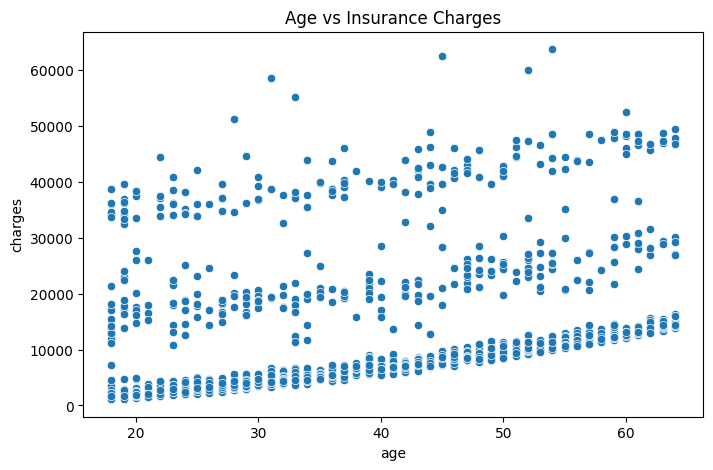

In [411]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data= df)
plt.title('Age vs Insurance Charges')
plt.show()

Insurance charges tend to increase with age, but the wide spread of values at the same age indicates that other factors such as smoking and health condition play a significant role.

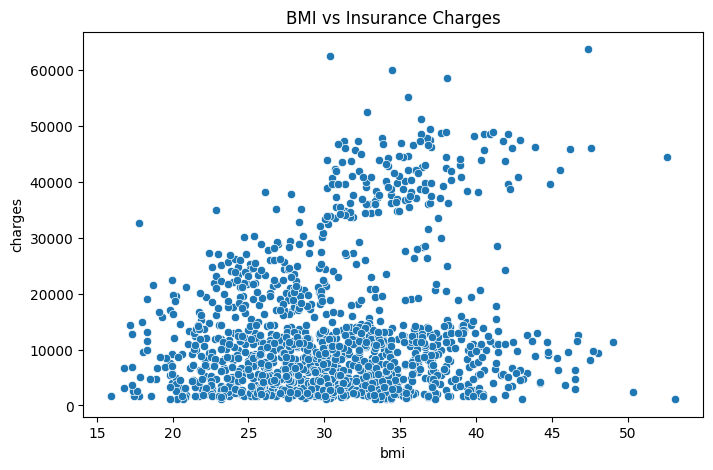

In [412]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi' , y ="charges" , data =df)
plt.title('BMI vs Insurance Charges')
plt.show()

While insurance charges tend to increase with higher BMI, the wide spread of costs at similar BMI values suggests that other factors such as smoking status and age have a significant impact.

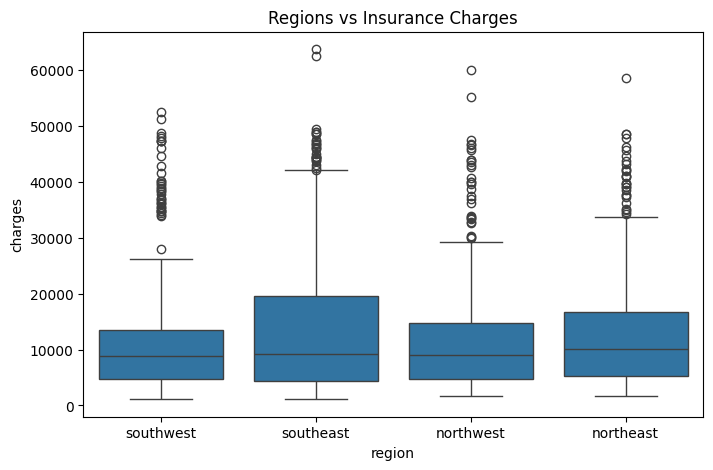

In [413]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region',y ='charges' ,data=df )
plt.title('Regions vs Insurance Charges')
plt.show()

Although all regions contain outliers, the Southeast region shows the widest range of insurance charges, while the Southwest has the lowest overall charges.

In [414]:
df_encoded= pd.get_dummies(df , drop_first=True)

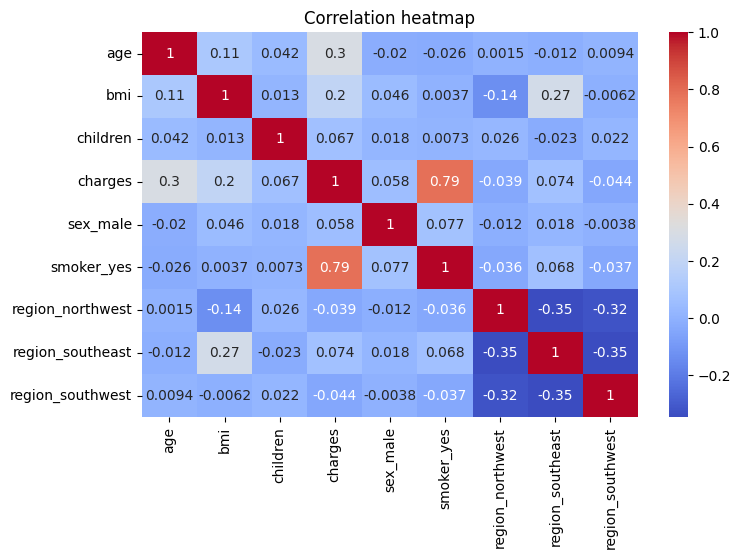

In [415]:
plt.figure(figsize=(8,5))
sns.heatmap(df_encoded.corr() , annot=True , cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

The heatmap shows that smoking has the strongest positive correlation with insurance charges, followed by age and BMI, while other features have minimal impact.

In [416]:
categorical_features = ['sex', 'smoker', 'region']

for col in categorical_features:
    print(col, df[col].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


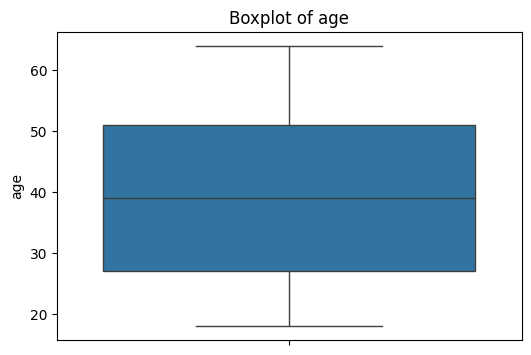

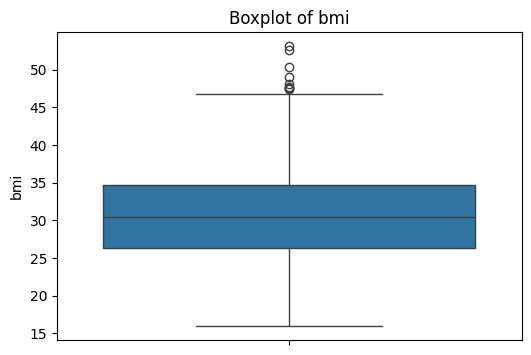

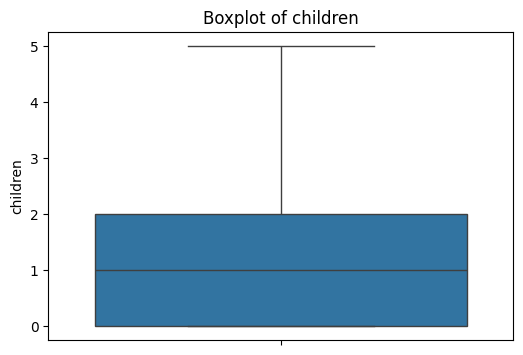

In [417]:
numeric_features = ['age', 'bmi', 'children']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

There exist outliers in bmi, let's see how we can handle them
Charges are the target, so we will leave it as it is 

In [418]:
Q1= df['bmi'].quantile(0.25)
Q3= df['bmi'].quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['bmi'] = np.where(df['bmi'] > upper_bound, upper_bound,
                       np.where(df['bmi'] < lower_bound, lower_bound, df['bmi']))

In [419]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encoding categorical features

In [420]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train[['sex','smoker','region']])
X_test_encoded = ohe.transform(X_test[['sex','smoker','region']])

Scaling numerical features

In [421]:
numeric_features = ['age','bmi','children']
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_numeric_scaled = scaler.transform(X_test[numeric_features])

Combining numerical features with categorical

In [422]:
X_train_final = np.hstack([X_train_numeric_scaled, X_train_encoded])
X_test_final = np.hstack([X_test_numeric_scaled, X_test_encoded])

In [423]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

Building the model

In [424]:
lr = LinearRegression()
lr.fit(X_train_final, y_train_log)

LinearRegression()

In [425]:
y_pred_log = lr.predict(X_test_final)
y_pred = np.expm1(y_pred_log) 
y_test_original = y_test

In [426]:
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 51674775.43958406
RMSE: 7188.516915162964
R2: 0.7187860128086638


# -----------------------------
# Insights from the Medical Insurance Cost Analysis
# -----------------------------
# 1. Smokers have a significantly higher impact on insurance charges compared to non-smokers.
# 2. Higher BMI is associated with increased charges, but outliers were capped to reduce skewness.
# 3. The number of children has a relatively minor effect on insurance costs.
# 4. Geographic region has a small influence on charges.
# 5. Linear Regression explains about 72% of the variance in charges (R² ≈ 0.72).
# 6. The average prediction error (RMSE ≈ 7,188) indicates that individual predictions can still vary.